<a href="https://colab.research.google.com/github/rickoefendi/Topik_Modeling/blob/main/LDA_dan_LSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade gensim
!pip install pyldavis --upgrade pyldavis
!pip install --upgrade pyldavis
!pip install Sastrawi
!pip install swifter


In [ ]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
! gdown --id 1ypG9Ro6BCF48pXkIo9K0ZdWAQXJP5uQEaCYZlnnayfA

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ypG9Ro6BCF48pXkIo9K0ZdWAQXJP5uQEaCYZlnnayfA
From (redirected): https://docs.google.com/spreadsheets/d/1ypG9Ro6BCF48pXkIo9K0ZdWAQXJP5uQEaCYZlnnayfA/export?format=xlsx
To: /content/Hasil.xlsx
125kB [00:00, 62.7MB/s]


In [ ]:
dataSB = pd.read_excel('/content/Hasil.xlsx', sheet_name="Riko2") #lokasi file

dataSB.head()

,created_at,full_text,username
0,Mon Apr 29 06:35:02 +0000 2024,Mari bersatu untuk mendukung pemerintahan #Pra...,anjaniriani28
1,Mon Apr 29 06:35:02 +0000 2024,Jangan mudah terprovokasi ya berita yang negat...,anjaniriani28
2,Mon Apr 29 06:35:01 +0000 2024,Tinggalkan perbedaan bersatu menuju Indonesia ...,anjaniriani28
3,Mon Apr 29 06:35:00 +0000 2024,Bersatu menuju Indonesia yang lebih maju dan b...,anjaniriani28
4,Mon Apr 29 05:48:26 +0000 2024,Bersatu menuju Indonesia yang lebih maju dan b...,rocky_trixiah


## **Text Prepocessing**

In [ ]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas

dataSB['full_text'] = dataSB['full_text'].str.lower()

print('Case Folding Result : \n')
print(dataSB['full_text'].head(5))

Case Folding Result : 

0    mari bersatu untuk mendukung pemerintahan #pra...
1    jangan mudah terprovokasi ya berita yang negat...
2    tinggalkan perbedaan bersatu menuju indonesia ...
3    bersatu menuju indonesia yang lebih maju dan b...
4    bersatu menuju indonesia yang lebih maju dan b...
Name: full_text, dtype: object


In [ ]:
import string
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
# ------ Tokenizing ---------

nltk.download('punkt')

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

dataSB['full_text'] = dataSB['full_text'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

dataSB['full_text'] = dataSB['full_text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

dataSB['full_text'] = dataSB['full_text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

dataSB['full_text'] = dataSB['full_text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

dataSB['full_text'] = dataSB['full_text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dataSB['full_text'] = dataSB['full_text'].apply(remove_singl_char)

# NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

dataSB['full_text_tokens'] = dataSB['full_text'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n')
print(dataSB['full_text_tokens'].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokenizing Result : 

0      [mari, bersatu, untuk, mendukung, pemerintahan]
1    [jangan, mudah, terprovokasi, ya, berita, yang...
2    [tinggalkan, perbedaan, bersatu, menuju, indon...
3    [bersatu, menuju, indonesia, yang, lebih, maju...
4    [bersatu, menuju, indonesia, yang, lebih, maju...
Name: full_text_tokens, dtype: object


In [ ]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

dataSB['full_text_tokens_fdist'] = dataSB['full_text_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(dataSB['full_text_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(mari, 1), (bersatu, 1), (untuk, 1), (menduku...
1    [(jangan, 1), (mudah, 1), (terprovokasi, 1), (...
2    [(tinggalkan, 1), (perbedaan, 1), (bersatu, 1)...
3    [(bersatu, 1), (menuju, 1), (indonesia, 1), (y...
4    [(bersatu, 1), (menuju, 1), (indonesia, 1), (y...
Name: full_text_tokens_fdist, dtype: object


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords


# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['yg', 'utk', 'cuman', 'deh', 'Btw', 'gua', 'gue', 'lo', 'lu',
    'kalo', 'trs', 'jd', 'nih', 'ntar', 'nya', 'lg', 'gk', 'ecusli', 'dpt',
    'dr', 'kpn', 'kok', 'kyk', 'donk', 'yah', 'u', 'ya', 'ga', 'km', 'eh',
    'sih', 'eh', 'bang', 'br', 'kyk', 'rp', 'jt', 'kan', 'gpp', 'sm', 'usah',
    'mas', 'sob', 'thx', 'ato', 'jg', 'gw', 'wkwk', 'mak', 'haha', 'iy',
    'tp', 'haha', 'dg', 'dri', 'duh', 'ye', 'wkwkwk', 'syg', 'btw',
    'nerjemahin', 'gaes', 'guys', 'kmrn', 'nemu', 'yukkk',
    'wkwkw', 'klas', 'iw', 'ew', 'lho', 'sbnry', 'org', 'gtu', 'bwt',
    'klrga', 'clau', 'lbh', 'cpet', 'ku', 'wke', 'mba', 'mas', 'sdh', 'kmrn',
    'oi', 'spt', 'dlm', 'bs', 'krn', 'jgn', 'spt', 'sh', 'wakakaka',
    'sihhh', 'hehe', 'ih', 'dgn', 'la', 'kl', 'ttg', 'kmna', 'kmn',
    'tdk', 'tuh', 'pls', 'bbrp', 'pd', 'dhhh',
    'kpd', 'kzl', 'byar', 'sii', 'cm', 'sy', 'hahahaha', 'weh','wts','pc','nct', 'ml','ga', 'gaiss', 'nder','n',
    'dlu', 'tuhh' , 'dl', 'nan', 'nder','pr', 'shopee', 'cek', 'gempa'])

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dataSB['full_text_tokens_WSW'] = dataSB['full_text_tokens'].apply(stopwords_removal)

print(dataSB['full_text_tokens_WSW'].head())

0             [mari, bersatu, mendukung, pemerintahan]
1               [mudah, terprovokasi, berita, negatif]
2    [tinggalkan, perbedaan, bersatu, indonesia, maju]
3              [bersatu, indonesia, maju, berkeadilan]
4              [bersatu, indonesia, maju, berkeadilan]
Name: full_text_tokens_WSW, dtype: object


In [ ]:
! gdown --id 1zTYme9wN0IVX_NL7iyHCW2RNBwvcJzWdPX_2n9-pR3s

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1zTYme9wN0IVX_NL7iyHCW2RNBwvcJzWdPX_2n9-pR3s
From (redirected): https://docs.google.com/spreadsheets/d/1zTYme9wN0IVX_NL7iyHCW2RNBwvcJzWdPX_2n9-pR3s/export?format=xlsx
To: /content/normalisasi.xlsx
7.72kB [00:00, 16.4MB/s]


In [ ]:
normalizad_word = pd.read_excel('/content/normalisasi.xlsx') #lokasi file

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

dataSB['full_text_normalized'] = dataSB['full_text_tokens_WSW'].apply(normalized_term)

dataSB['full_text_normalized'].head(10)

0             [mari, bersatu, mendukung, pemerintahan]
1               [mudah, terprovokasi, berita, negatif]
2    [tinggalkan, perbedaan, bersatu, indonesia, maju]
3              [bersatu, indonesia, maju, berkeadilan]
4              [bersatu, indonesia, maju, berkeadilan]
5    [tinggalkan, perbedaan, bersatu, indonesia, maju]
6               [mudah, terprovokasi, berita, negatif]
7             [mari, bersatu, mendukung, pemerintahan]
8    [alasan, mahfud, md, enggan, komentari, gugata...
9             [mari, bersatu, mendukung, pemerintahan]
Name: full_text_normalized, dtype: object

In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in dataSB['full_text_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))


3075


In [ ]:
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

    print(term,":" ,term_dict[term])

mari : mari
bersatu : satu
mendukung : dukung
pemerintahan : perintah
mudah : mudah
terprovokasi : provokasi
berita : berita
negatif : negatif
tinggalkan : tinggal
perbedaan : beda
indonesia : indonesia
maju : maju
berkeadilan : adil
alasan : alas
mahfud : mahfud
md : md
enggan : enggan
komentari : komentar
gugatan : gugat
pdip : pdip
ptun : ptun
mantan : mantan
cawapres : cawapres
ganjar : ganjar
tunggu : tunggu
pengamat : amat
politik : politik
lipi : lipi
percaya : percaya
presiden : presiden
jokowi : jokowi
dimakzulkan : makzul
fahri : fahri
bachmid : bachmid
aman : aman
pemakzulan : makzul
yusril : yusril
beranggapan : anggap
menebak : tebak
sikap : sikap
anies : anies
baswedan : baswedan
terkait : kait
langkah : langkah
pkb : pkb
nasdem : nasdem
merapat : rapat
kubu : kubu
prabowogibran : prabowogibran
sukseskn : sukseskn
pilkada : pilkada
serentak : serentak
rajut : rajut
persatuan : satu
pasca : pasca
kontestasi : kontestasi
pilpres : pilpres
kalah : kalah
lawan : lawan
identit

In [ ]:
# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

dataSB['full_text_tokens_stemmed'] = dataSB['full_text_normalized'].swifter.apply(get_stemmed_term)

print(dataSB['full_text_tokens_stemmed'])

Pandas Apply:   0%|          | 0/1477 [00:00<?, ?it/s]

0                          [mari, satu, dukung, perintah]
1                     [mudah, provokasi, berita, negatif]
2                  [tinggal, beda, satu, indonesia, maju]
3                           [satu, indonesia, maju, adil]
4                           [satu, indonesia, maju, adil]
                              ...                        
1472    [komposisi, hakim, mk, musyawarah, putus, seli...
1473    [moga, sempat, ngerasain, asyik, pilih, presid...
1474    [wakil, ketua, partai, bangkit, bangsa, jazilu...
1475    [wakil, ketua, partai, bangkit, bangsa, jazilu...
1476    [tweet, sempat, temu, ucap, selamat, hasil, be...
Name: full_text_tokens_stemmed, Length: 1477, dtype: object


In [ ]:
#stopwords #2

from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["ada", "tan", "ton", "pt", "komentar", "juta", "unit", "menang", "artikel",
                       "smartphone", "tagar", "sedia", "kaskus", "seksi", "tweet"])

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dataSB['full_text_tokens_stemmed2'] = dataSB['full_text_tokens_stemmed'].apply(stopwords_removal)

print(dataSB['full_text_tokens_stemmed2'].head())

0               [mari, dukung, perintah]
1    [mudah, provokasi, berita, negatif]
2       [tinggal, beda, indonesia, maju]
3                [indonesia, maju, adil]
4                [indonesia, maju, adil]
Name: full_text_tokens_stemmed2, dtype: object


In [ ]:
for i in range(len(dataSB)):
        a=dataSB.iloc[i][6]
        document.append(a)

document[0:5]

['tweet', 'kesempatan', 'pertemuan', 'ucapan', 'selamat']

In [ ]:
doc_clean = dataSB['full_text_tokens_stemmed2']
doc_clean

0                                [mari, dukung, perintah]
1                     [mudah, provokasi, berita, negatif]
2                        [tinggal, beda, indonesia, maju]
3                                 [indonesia, maju, adil]
4                                 [indonesia, maju, adil]
                              ...                        
1472    [komposisi, hakim, mk, musyawarah, putus, seli...
1473    [moga, ngerasain, asyik, pilih, presiden, moga...
1474    [wakil, ketua, partai, bangkit, bangsa, jazilu...
1475    [wakil, ketua, partai, bangkit, bangsa, jazilu...
1476    [temu, selamat, hasil, beliau, pilih, presiden...
Name: full_text_tokens_stemmed2, Length: 1477, dtype: object

### **LDA**

In [ ]:
import pandas as pd
from gensim.corpora import Dictionary

# Contoh data dokumen yang sudah diproses
doc_clean = dataSB['full_text_tokens_stemmed2']

# Membuat kamus (dictionary) dokumen
dictionary = Dictionary(doc_clean)

# Membuat matriks term-dokumen
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Menyiapkan data untuk DataFrame
data = []
for doc in doc_term_matrix:
    for word_id, freq in doc:
        data.append([dictionary[word_id], freq])

# Membuat DataFrame
df = pd.DataFrame(data, columns=['Kata', 'Frekuensi Kemunculan'])

# Mengelompokkan DataFrame berdasarkan 'Kata' dan menjumlahkan frekuensinya
df_grouped = df.groupby('Kata').sum().reset_index()

# Mengurutkan berdasarkan frekuensi kemunculan kata dari yang tertinggi
df_sorted = df_grouped.sort_values(by='Frekuensi Kemunculan', ascending=False)

# Mengambil 10 kata dengan frekuensi kemunculan tertinggi
df_top10 = df_sorted.head(10)

# Menampilkan DataFrame
print("Tabel Frekuensi Kemunculan Kata (Top 10):")
print(df_top10)


Tabel Frekuensi Kemunculan Kata (Top 10):
            Kata  Frekuensi Kemunculan
1742    presiden                  1550
1669       pilih                  1106
1366          mk                   616
1671     pilpres                   533
2399       wakil                   525
1788       putus                   434
1727     prabowo                   416
752        hasil                   399
1085  konstitusi                   323
1256    mahkamah                   314


In [ ]:
# membuat objecy model LDA dengan gensim
Lda = gensim.models.ldamodel.LdaModel

total_topics = 3
number_words = 10

In [ ]:
# Running and Trainign LDA model on the document term matrix.
lda_model = Lda(doc_term_matrix, num_topics=total_topics, id2word = dictionary, passes=50)

lda_model.show_topics(num_topics=total_topics, num_words=number_words)

[(0,
  '0.056*"mk" + 0.045*"presiden" + 0.039*"putus" + 0.039*"pilih" + 0.035*"pilpres" + 0.031*"hasil" + 0.029*"konstitusi" + 0.028*"mahkamah" + 0.028*"sengketa" + 0.019*"mohon"'),
 (1,
  '0.041*"presiden" + 0.030*"indonesia" + 0.024*"harga" + 0.022*"wakil" + 0.019*"pilih" + 0.018*"terima" + 0.018*"prabowo" + 0.018*"republik" + 0.017*"subianto" + 0.017*"gibran"'),
 (2,
  '0.108*"presiden" + 0.074*"pilih" + 0.046*"wakil" + 0.039*"prabowo" + 0.038*"kpu" + 0.028*"calon" + 0.022*"gibran" + 0.022*"pasang" + 0.019*"komisi" + 0.019*"rakabuming"')]

In [ ]:
import pandas as pd  # Import modul pandas

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp_wcount)


          word  topic_id  importance  word_count
0           mk         0    0.056430         616
1     presiden         0    0.045425        1550
2        putus         0    0.039358         434
3        pilih         0    0.038890        1106
4      pilpres         0    0.034854         533
5        hasil         0    0.030552         399
6   konstitusi         0    0.029163         323
7     mahkamah         0    0.028280         314
8     sengketa         0    0.028123         306
9        mohon         0    0.019460         230
10    presiden         1    0.040764        1550
11   indonesia         1    0.029787         200
12       harga         1    0.024226         112
13       wakil         1    0.021544         525
14       pilih         1    0.018805        1106
15      terima         1    0.018342         132
16     prabowo         1    0.017737         416
17    republik         1    0.017597          80
18    subianto         1    0.017342         227
19      gibran      

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
#simpan ke google drive
df_imp_wcount.to_csv('df_imp_wcount.csv')
!cp df_imp_wcount.csv "drive/My Drive/TA/LDA"

In [ ]:
#Dominant topic and its percentage contribution in each topic
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=document):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
import pandas as pd
from tabulate import tabulate

def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
    # Inisialisasi list untuk mengumpulkan data
    data = []

    # Mendapatkan topik utama dalam setiap dokumen
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Mendapatkan topik dominan, Kontribusi Persentase, dan Kata Kunci untuk setiap dokumen
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => topik dominan
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                data.append([int(topic_num), round(prop_topic, 4), topic_keywords, texts[i]])
                break  # Keluar dari loop setelah menemukan topik dominan

    # Konversi data ke dalam DataFrame
    df_topic_sents_keywords = pd.DataFrame(data, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text'])

    return df_topic_sents_keywords

# Memanggil fungsi format_topics_sentences dengan argumen yang sesuai
df_dominant_topic = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=document)

# Menyimpan DataFrame ke dalam file CSV
df_dominant_topic.to_csv('df_dominant_topic.csv', index=False)

# Menyalin file CSV ke Google Drive (harus disesuaikan dengan path di Google Drive Anda)
!cp df_dominant_topic.csv "drive/My Drive/TA/LDA/df_dominant_topic.csv"

# Mengubah DataFrame menjadi format tabel menggunakan tabulate dan menampilkannya
output_table = tabulate(df_dominant_topic, headers='keys', tablefmt='pretty')
print(output_table)


+------+----------------+---------------------+---------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|      | Dominant_Topic |  Perc_Contribution  |                                    Topic_Keywords                                     |                                                                                                                                                                        Text                                                                                                                                                                        |
+------+----------------+---------------------

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
import pickle

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import os
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(total_topics))
corpus = [dictionary.doc2bow(text) for text in doc_clean]
# proses ini mungkin agak lama
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pickle

if 1 == 1:  # Ini adalah kondisi yang tidak perlu
    # Persiapkan data visualisasi
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

    # Simpan data visualisasi ke file menggunakan pickle
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install selenium

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.2 MB/s eta 0:00:00


In [ ]:
pyLDAvis.save_html(LDAvis_prepared, 'drive/My Drive/TA/LDA/ldavis_prepared_'+ str(total_topics) +'.jpg')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.display(LDAvis_prepared)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import CoherenceModel

# Inisialisasi model Coherence
coherence_model = CoherenceModel(model=lda_model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Coherence Score:", coherence_score)

Coherence Score: 0.7066367720788777


### **LSA**

In [ ]:
import gensim
from gensim import corpora
from gensim.models import TfidfModel, LsiModel
from tabulate import tabulate

# Contoh data dokumen yang sudah diproses
doc_clean = dataSB['full_text_tokens_stemmed2']

# Buat kamus (dictionary) dari dokumen
dictionary = corpora.Dictionary(doc_clean)

# Buat matriks term-dokumen
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Hitung TF-IDF dari matriks term-dokumen
tfidf_model = TfidfModel(doc_term_matrix)
doc_tfidf = tfidf_model[doc_term_matrix]

# Menampilkan informasi lengkap dari matriks term-dokumen (batasi jumlah output)
rows = []
max_display = 10  # Ubah sesuai kebutuhan
for doc in doc_tfidf[:max_display]:
    for idx, freq in doc:
        rows.append([dictionary[idx], freq, tfidf_model.idfs.get(idx)])
print("Informasi Lengkap Matriks Term-Dokumen:")
print(tabulate(rows, headers=['Kata', 'TF', 'IDF'], tablefmt='pretty', showindex=False, numalign="right", colalign=("left", "right", "right")))

Informasi Lengkap Matriks Term-Dokumen:
+-----------+---------------------+--------------------+
| Kata      |                  TF |                IDF |
+-----------+---------------------+--------------------+
| dukung    |  0.5419991730579125 |  5.206526015877427 |
| mari      |  0.6619226541090582 |  6.358529109322476 |
| perintah  |  0.5177791965517341 |  4.973865259087152 |
| berita    |  0.4427429707818853 |  5.884597920990065 |
| mudah     |  0.5224115809279612 |  6.943491610043633 |
| negatif   |  0.5318562220750539 |  7.069022492127493 |
| provokasi |  0.4981904866370189 |  6.621563515156271 |
| beda      |  0.5708075628068296 |  6.206526015877427 |
| indonesia | 0.27209914148075154 | 2.9585985024338415 |
| maju      |  0.4788386318224755 |  5.206526015877427 |
| tinggal   |  0.6089781179339245 |  6.621563515156271 |
| indonesia |  0.3895775959593542 | 2.9585985024338415 |
| maju      |  0.6855765954375957 |  5.206526015877427 |
| adil      |  0.6149910800285849 | 4.6704731156

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import warnings

# Mengabaikan semua peringatan DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import LsiModel

# Definisikan jumlah topik dan jumlah kata kunci
total_topics = 3
number_words = 10

# Membuat model LSA
lsa_model = LsiModel(doc_term_matrix, num_topics=total_topics, id2word=dictionary)

# Menampilkan topik-topik dan kata kunci terkait
lsa_model.show_topics(num_topics=total_topics, num_words=number_words)


[(0,
  '0.659*"presiden" + 0.442*"pilih" + 0.247*"wakil" + 0.182*"mk" + 0.155*"pilpres" + 0.152*"hasil" + 0.145*"prabowo" + 0.118*"putus" + 0.118*"kpu" + 0.116*"konstitusi"'),
 (1,
  '0.467*"mk" + 0.292*"putus" + 0.230*"sengketa" + 0.230*"hasil" + 0.222*"konstitusi" + 0.220*"pilpres" + 0.218*"mahkamah" + -0.218*"prabowo" + -0.168*"rakabuming" + -0.166*"gibran"'),
 (2,
  '-0.306*"presiden" + 0.293*"prabowo" + 0.293*"pilpres" + 0.290*"putus" + -0.244*"mohon" + -0.219*"wakil" + 0.215*"sengketa" + 0.211*"gibran" + 0.208*"subianto" + 0.207*"mk"')]

In [ ]:
from gensim.models import LsiModel

# Menjalankan dan melatih model LSA pada matriks dokumen-term.
lsa_model = LsiModel(doc_term_matrix, num_topics=total_topik, id2word=dictionary)

# Menampilkan topik-topik
topics = lsa_model.print_topics(num_topics=total_topik, num_words=jumlah_kata)
for topic in topics:
    print(topic)


(0, '0.659*"presiden" + 0.442*"pilih" + 0.247*"wakil" + 0.182*"mk" + 0.155*"pilpres" + 0.152*"hasil" + 0.145*"prabowo" + 0.118*"putus" + 0.118*"kpu" + 0.116*"konstitusi"')
(1, '0.467*"mk" + 0.292*"putus" + 0.230*"sengketa" + 0.230*"hasil" + 0.222*"konstitusi" + 0.220*"pilpres" + 0.218*"mahkamah" + -0.218*"prabowo" + -0.168*"rakabuming" + -0.166*"gibran"')
(2, '-0.306*"presiden" + 0.293*"prabowo" + 0.293*"pilpres" + 0.290*"putus" + -0.244*"mohon" + -0.219*"wakil" + 0.215*"sengketa" + 0.211*"gibran" + 0.208*"subianto" + 0.207*"mk"')


In [ ]:
import pandas as pd  # Import modul pandas
from collections import Counter

# Assuming lsa_model is your trained LSA model and doc_clean is your cleaned document list

topics = lsa_model.show_topics(num_topics=total_topik, formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i, weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp_wcount)


          word  topic_id  importance  word_count
0     presiden         0    0.658620        1550
1        pilih         0    0.442291        1106
2        wakil         0    0.247053         525
3           mk         0    0.181917         616
4      pilpres         0    0.155021         533
5        hasil         0    0.152138         399
6      prabowo         0    0.145361         416
7        putus         0    0.118469         434
8          kpu         0    0.117599         307
9   konstitusi         0    0.115649         323
10          mk         1    0.467163         616
11       putus         1    0.291729         434
12    sengketa         1    0.230386         306
13       hasil         1    0.229528         399
14  konstitusi         1    0.222480         323
15     pilpres         1    0.219684         533
16    mahkamah         1    0.217782         314
17     prabowo         1   -0.217525         416
18  rakabuming         1   -0.168232         230
19      gibran      

In [ ]:
import pandas as pd
from tabulate import tabulate

def format_topics_sentences(lsamodel=None, corpus=None, texts=None):
    # Inisialisasi list untuk mengumpulkan data
    data = []

    # Mendapatkan topik utama dalam setiap dokumen
    for i, row_list in enumerate(lsamodel[corpus]):
        row = row_list
        row = sorted(row, key=lambda x: (abs(x[1])), reverse=True)
        # Mendapatkan topik dominan, Kontribusi Persentase, dan Kata Kunci untuk setiap dokumen
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => topik dominan
                wp = lsamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                data.append([int(topic_num), round(prop_topic, 4), topic_keywords, texts[i]])
                break  # Keluar dari loop setelah menemukan topik dominan

    # Konversi data ke dalam DataFrame
    df_topic_sents_keywords = pd.DataFrame(data, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text'])

    # Mengubah DataFrame menjadi format tabel menggunakan tabulate
    table = tabulate(df_topic_sents_keywords, headers='keys', tablefmt='pretty')

    return table

# Memanggil fungsi format_topics_sentences dengan argumen yang sesuai
output_table = format_topics_sentences(lsamodel=lsa_model, corpus=doc_term_matrix, texts=document)

# Menampilkan output dalam bentuk tabel
print(output_table)


+------+----------------+-------------------+----------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|      | Dominant_Topic | Perc_Contribution |                                     Topic_Keywords                                     |                                                                                                                                                                        Text                                                                                                                                                                        |
+------+----------------+-------------------+---

In [ ]:
import pandas as pd

def format_topics_sentences(lsamodel=None, corpus=None, texts=None):
    # Inisialisasi list untuk mengumpulkan data
    data = []

    # Mendapatkan topik utama dalam setiap dokumen
    for i, row_list in enumerate(lsamodel[corpus]):
        row = row_list
        row = sorted(row, key=lambda x: (abs(x[1])), reverse=True)
        # Mendapatkan topik dominan, Kontribusi Persentase, dan Kata Kunci untuk setiap dokumen
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => topik dominan
                wp = lsamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                data.append([int(topic_num), round(prop_topic, 4), topic_keywords, texts[i]])
                break  # Keluar dari loop setelah menemukan topik dominan

    # Konversi data ke dalam DataFrame
    df_topic_sents_keywords = pd.DataFrame(data, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text'])
    return df_topic_sents_keywords

# Memanggil fungsi format_topics_sentences dengan argumen yang sesuai
df_topic_sents_keywords = format_topics_sentences(lsamodel=lsa_model, corpus=doc_term_matrix, texts=document)

# Menampilkan DataFrame yang dihasilkan
print(df_topic_sents_keywords.head(10))


   Dominant_Topic  Perc_Contribution  \
0               2             0.0498   
1               0             0.0057   
2               2             0.1672   
3               2             0.1709   
4               2             0.1709   
5               2             0.1672   
6               0             0.0057   
7               2             0.0498   
8               1             0.1530   
9               2             0.0498   

                                      Topic_Keywords          Text  
0  presiden, prabowo, pilpres, putus, mohon, waki...         tweet  
1  presiden, pilih, wakil, mk, pilpres, hasil, pr...    kesempatan  
2  presiden, prabowo, pilpres, putus, mohon, waki...     pertemuan  
3  presiden, prabowo, pilpres, putus, mohon, waki...        ucapan  
4  presiden, prabowo, pilpres, putus, mohon, waki...       selamat  
5  presiden, prabowo, pilpres, putus, mohon, waki...  keberhasilan  
6  presiden, pilih, wakil, mk, pilpres, hasil, pr...        beliau  
7  pres

In [ ]:
# Menghitung jumlah dokumen di setiap topik dominan
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Menghitung proporsi dokumen di setiap topik dominan
topic_contribution = topic_counts / len(df_topic_sents_keywords)

# Membuat DataFrame untuk distribusi topik
df_topic_distribution = pd.DataFrame({'Topic_Num': topic_counts.index, 'Num_Documents': topic_counts.values, 'Perc_Documents': topic_contribution.values})

print(df_topic_distribution)


   Topic_Num  Num_Documents  Perc_Documents
0          0            926        0.629932
1          2            297        0.202041
2          1            247        0.168027


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menginisialisasi TfidfVectorizer dengan jumlah fitur maksimum 1000
vect = TfidfVectorizer(max_features=1000)
vect_text = vect.fit_transform([" ".join(doc) for doc in doc_clean])
idf = vect.idf_
dd = dict(zip(vect.get_feature_names_out(), idf))
sorted_words = sorted(dd, key=dd.get)
print(sorted_words[0], sorted_words[-1])
print(dd.get('pilpres', None))
print(dd.get('indonesia', None))


presiden zerong
2.0838370030859554
3.0461716734615174


In [ ]:
pip uninstall scikit-learn -y


Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2


In [ ]:
pip install scikit-learn==1.0.2


In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
lsa_top=lsa_model.fit_transform(vect_text)

print(lsa_top)
print(lsa_top.shape)

[[ 0.01759553  0.01243233  0.0145389  ...  0.06958012 -0.01445225
  -0.10265388]
 [ 0.00586746  0.00187885 -0.00347819 ... -0.02152745 -0.01187897
   0.00338044]
 [ 0.03810146 -0.04224051  0.10660002 ... -0.01369248  0.04831943
   0.33397557]
 ...
 [ 0.1778844  -0.02596908  0.00335112 ... -0.07144832  0.19425023
  -0.01247908]
 [ 0.19873275 -0.00923047 -0.01377    ... -0.07219206  0.20068514
   0.0118234 ]
 [ 0.2198246   0.01872712  0.07250399 ... -0.04656956  0.00602764
  -0.06904391]]
(1477, 10)


In [ ]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  1.7595534092040808
Topic  1  :  1.2432334527195843
Topic  2  :  1.4538900109223523
Topic  3  :  -6.680890796305941
Topic  4  :  -1.4518317997221653
Topic  5  :  10.69605062471011
Topic  6  :  14.259199553613708
Topic  7  :  6.958011835473322
Topic  8  :  -1.445224975442752
Topic  9  :  -10.265388174928221


In [ ]:
print(lsa_model.components_.shape)
print(lsa_model.components_)

(10, 1000)
[[ 3.34543317e-07  2.86932206e-02  1.39355572e-06 ...  2.58063408e-03
   4.21960476e-07  9.94348086e-07]
 [ 4.74097813e-07 -2.88202155e-02  6.93156007e-07 ...  2.30313388e-03
   6.54983923e-07  1.45975022e-06]
 [ 1.56820909e-07 -4.01620817e-02  2.36318109e-06 ...  8.90379266e-04
   5.23308189e-07  1.08702497e-06]
 ...
 [-1.48777453e-05  4.81505949e-02 -1.60399329e-05 ... -5.98499977e-03
  -2.14240025e-05 -4.94564228e-05]
 [ 2.60628275e-05  2.78574667e-02  8.77204552e-05 ... -5.65659988e-03
   3.44483210e-05  7.89573593e-05]
 [ 7.49687211e-06 -4.09570359e-02 -1.97636144e-05 ... -1.22454198e-02
   1.42971295e-05  2.78048614e-05]]


In [ ]:
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
presiden pilih wakil mk prabowo pilpres hasil kpu mohon gibran 

Topic 1: 
mk putus mohon sengketa konstitusi mahkamah hasil tolak pilpres selisih 

Topic 2: 
terima mandat republik indonesia pbnu cholil kh staquf yahya mk 

Topic 3: 
mohon presiden wakil perkara urut nomor selisih calon tolak pasang 

Topic 4: 
percaya publik persen mk kerja phpu sidang kait selisih wakil 

Topic 5: 
prabowogibran indonesia maju bangun adil menteri bangsa perintah momentum moga 

Topic 6: 
putus prabowo menteri bangun presiden momentum perintah gibran bangsa nyata 

Topic 7: 
prabowo tolak gibran mohon bangun menteri anies subianto aju momentum 

Topic 8: 
calon anies nomor urut ganjar baswedan iskandar muhaimin pasang md 

Topic 9: 
adil maju pasca indonesia kpu rakabuming raka mk perkara nomor 



In [ ]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 8.6 MB/s eta 0:00:00


In [ ]:
from sklearn.decomposition import TruncatedSVD

# Definisikan dan latih model TruncatedSVD
svd_model = TruncatedSVD(n_components=100, random_state=42)
X_topics = svd_model.fit_transform(vect_text)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


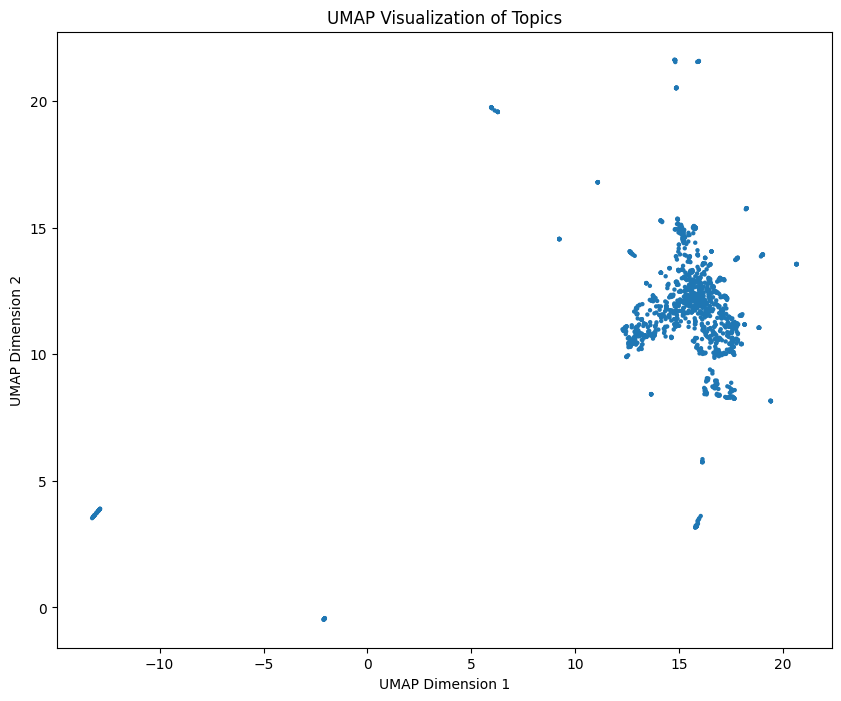

In [ ]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Mengurangi dimensi data X menjadi X_topics dengan TruncatedSVD
X_topics = svd_model.fit_transform(vect_text)

# Menerapkan UMAP pada X_topics
embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42).fit_transform(X_topics)

# Membuat plot menggunakan seaborn untuk visualisasi yang lebih baik
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], s=10, edgecolor='none')
plt.title('UMAP Visualization of Topics')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


In [ ]:
from gensim.models import CoherenceModel

# Inisialisasi model Coherence
coherence_model = CoherenceModel(model=Lsa, texts=doc_clean, dictionary=dictionary, coherence='c_v')

# Menghitung skor koherensi
coherence_score = coherence_model.get_coherence()

print("Coherence Score:", coherence_score)


Coherence Score: 0.6458367253037383


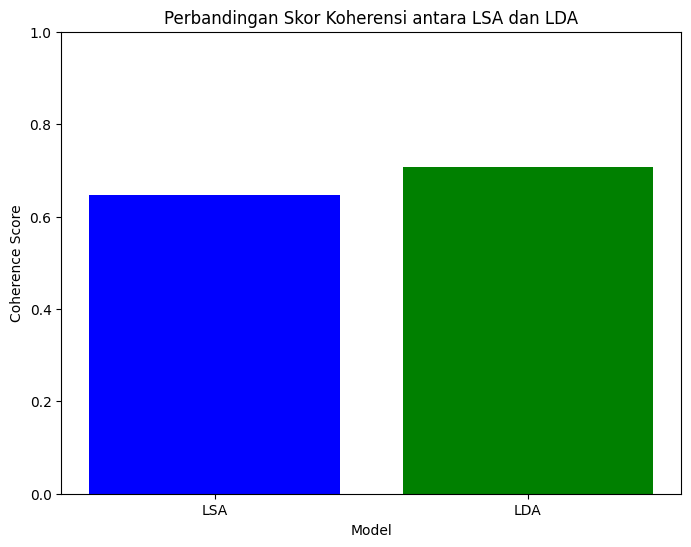

In [ ]:
import matplotlib.pyplot as plt

# Nilai koherensi LSA dan LDA
coherence_lsa = 0.6458367253037383
coherence_lda = 0.7066367720788777

# Nama model
model_names = ['LSA', 'LDA']

# Nilai koherensi
coherences = [coherence_lsa, coherence_lda]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, coherences, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Coherence Score')
plt.title('Perbandingan Skor Koherensi antara LSA dan LDA')
plt.ylim(0, 1)  # Sesuaikan batas sumbu y
plt.show()